In [1]:
# let us first import the libraries
# local import for convinience
import sys, os
sys.path.insert(1, '../src/SupplyNetPy/Components/')
import core as scm
import utilities as scm

def print_performance_metrics(supplychainnet):
    print("Performance Metrics:")
    print("Total Available Inventory:", supplychainnet["total_available_inv"])
    print("Average Available Inventory:", supplychainnet["avg_available_inv"])
    print("Total Inventory Carry Cost:", supplychainnet["total_inv_carry_cost"])
    print("Total Inventory Spend:", supplychainnet["total_inv_spend"])
    print("Total Transport Cost:", supplychainnet["total_transport_cost"])
    print("Total Revenue:", supplychainnet["total_revenue"])
    print("Total Cost:", supplychainnet["total_cost"])
    print("Total Profit:", supplychainnet["total_profit"])
    print("Total Demand Placed by Customers:", supplychainnet["total_demand_placed_by_customers"])
    print("Total Fulfillment Received by Customers:", supplychainnet["total_fulfillment_received_by_customers"])
    print("Total Demand Placed by Site:", supplychainnet["total_demand_placed_by_site"])
    print("Total Fulfillment Received by Site:", supplychainnet["total_fulfillment_received_by_site"])
    print("Total Demand Placed:", supplychainnet["total_demand_placed"])
    print("Total Fulfillment Received:", supplychainnet["total_fulfillment_received"])
    print("Average Cost per Order:", supplychainnet["avg_cost_per_order"])
    print("Average Cost per Item:", supplychainnet["avg_cost_per_item"])

### AnyLogistix 'Exercise 1'

__SC Network Desc:__

Total Nodes = 3, Replenish: RQ <br>

- S1 -> DC1 -> demand1 <br>
- (inf) -> RQ=(500,500) -> 120/2days <br>
- lead time = 2 for all links
- time period = 59 days <br>

INFO sim_trace - 0.0000:D1: Inventory levels:1000
INFO sim_trace - 0.0000:demand_2:Customer1:Demand at Distributor 1, Order quantity:120, available.
INFO sim_trace - 0.0000:D1: Inventory levels:880
INFO sim_trace - 2.0000:demand_2:Customer1:Demand at Distributor 1, Order quantity:120 received. Current inv: 760
INFO sim_trace - 2.0000:demand_2:Customer2:Demand at Distributor 1, Order quantity:120, available.
INFO sim_trace - 2.0000:D1: Inventory levels:760
INFO sim_trace - 4.0000:demand_2:Customer2:Demand at Distributor 1, Order quantity:120 received. Current inv: 640
INFO sim_trace - 4.0000:demand_2:Customer3:Demand at Distributor 1, Order quantity:120, available.
INFO sim_trace - 4.0000:D1: Inventory levels:640
INFO sim_trace - 6.0000:demand_2:Customer3:Demand at Distributor 1, Order quantity:120 received. Current inv: 520
INFO sim_trace - 6.0000:demand_2:Customer4:Demand at Distributor 1, Order quantity:120, available.
INFO sim_trace - 6.0000:D1: Inventory levels:520
INFO sim_trace -

Performance Metrics:
Total Available Inventory: 400
Average Available Inventory: 646.1016949152543
Total Inventory Carry Cost: 7600.0
Total Inventory Spend: 600000
Total Transport Cost: 370
Total Revenue: 900000
Total Cost: 607970.0
Total Profit: 292030.0
Total Demand Placed by Customers: [30, 3600]
Total Fulfillment Received by Customers: [29, 3480]
Total Demand Placed by Site: [7, 3500]
Total Fulfillment Received by Site: [6, 3000]
Total Demand Placed: [37, 7100]
Total Fulfillment Received: [35, 6480]
Average Cost per Order: 16431.62162162162
Average Cost per Item: 85.62957746478874


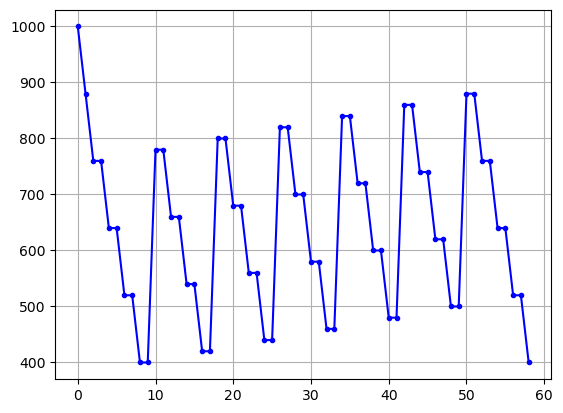

In [9]:
import simpy
env = simpy.Environment()
supplier = scm.Supplier(env=env, ID='S1', name='Supplier 1', node_type='infinite_supplier')
distributor = scm.InventoryNode(env=env, ID='D1', name='Distributor 1', node_type='distributor', capacity=5000, initial_level=1000, 
                                inventory_holding_cost=0.2, replenishment_policy=scm.RQReplenishment, policy_param={'R':500,'Q':500}, 
                                product_sell_price=250, product_buy_price=200)
link1  = scm.Link(env=env, ID='L1', source=supplier, sink=distributor, cost=10, lead_time=lambda: 2)
demand2 = scm.Demand(env=env, ID='demand_2', name='Dem 2', order_arrival_model=lambda: 2, order_quantity_model=lambda:120, 
                     demand_node=distributor, delivery_cost=lambda: 10, lead_time=lambda: 2)
scm.global_logger.enable_logging()
env.run(until=59)

import numpy as np
import matplotlib.pyplot as plt
supplynet = scm.create_sc_net(nodes=[supplier,distributor],links=[link1],demands=[demand2])
supplynet = scm.simulate_sc_net(supplynet, sim_time=60)
inv_levels = np.array(distributor.inventory.instantaneous_levels)
plt.plot(inv_levels[:,0], inv_levels[:,1], label='Inventory Level at D1', marker='.', color='blue')
plt.grid()
print_performance_metrics(supplynet)

### AnyLogistix 'Exercise 1'

__SC Network Desc:__

Total Nodes = 4, Replenish: RQ <br>

- S1 -> DC1 -> demand1, demand2 <br>
- (inf) -> RQ=(500,500) -> 120/2days, 80/2days <br>
- lead time = 2 for all links
- time period = 59 days <br>

INFO sim_trace - 0.0000:D1: Inventory levels:1000
INFO sim_trace - 0.0000:demand_1:Customer1:Demand at Distributor 1, Order quantity:80, available.
INFO sim_trace - 0.0000:D1: Inventory levels:800
INFO sim_trace - 0.0000:demand_2:Customer1:Demand at Distributor 1, Order quantity:120, available.
INFO sim_trace - 2.0000:demand_1:Customer1:Demand at Distributor 1, Order quantity:80 received. Current inv: 600
INFO sim_trace - 2.0000:demand_2:Customer1:Demand at Distributor 1, Order quantity:120 received. Current inv: 600
INFO sim_trace - 2.0000:demand_1:Customer2:Demand at Distributor 1, Order quantity:80, available.
INFO sim_trace - 2.0000:D1: Inventory levels:600
INFO sim_trace - 2.0000:demand_2:Customer2:Demand at Distributor 1, Order quantity:120, available.
INFO sim_trace - 4.0000:demand_1:Customer2:Demand at Distributor 1, Order quantity:80 received. Current inv: 400
INFO sim_trace - 4.0000:demand_2:Customer2:Demand at Distributor 1, Order quantity:120 received. Current inv: 400
INFO

Performance Metrics:
Total Available Inventory: 500
Average Available Inventory: 605.0847457627119
Total Inventory Carry Cost: 7100.0
Total Inventory Spend: 1100000
Total Transport Cost: 720
Total Revenue: 1500000
Total Cost: 1107820.0
Total Profit: 392180.0
Total Demand Placed by Customers: [60, 6000]
Total Fulfillment Received by Customers: [58, 5800]
Total Demand Placed by Site: [12, 6000]
Total Fulfillment Received by Site: [11, 5500]
Total Demand Placed: [72, 12000]
Total Fulfillment Received: [69, 11300]
Average Cost per Order: 15386.388888888889
Average Cost per Item: 92.31833333333333


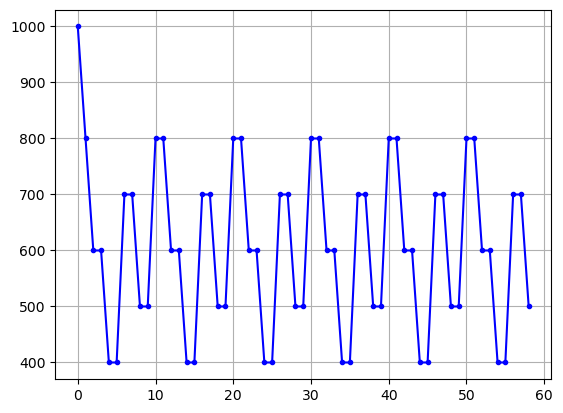

In [10]:
import simpy
env = simpy.Environment()
supplier = scm.Supplier(env=env, ID='S1', name='Supplier 1', node_type='infinite_supplier')
distributor = scm.InventoryNode(env=env, ID='D1', name='Distributor 1', node_type='distributor', capacity=5000, initial_level=1000, 
                                inventory_holding_cost=0.2, replenishment_policy=scm.RQReplenishment, policy_param={'R':500,'Q':500}, 
                                product_sell_price=250, product_buy_price=200)
link1  = scm.Link(env=env, ID='L1', source=supplier, sink=distributor, cost=10, lead_time=lambda: 2)
demand1 = scm.Demand(env=env, ID='demand_1', name='Dem 1', order_arrival_model=lambda: 2, order_quantity_model=lambda:80, 
                     demand_node=distributor, delivery_cost=lambda: 10, lead_time=lambda: 2)
demand2 = scm.Demand(env=env, ID='demand_2', name='Dem 2', order_arrival_model=lambda: 2, order_quantity_model=lambda:120, 
                     demand_node=distributor, delivery_cost=lambda: 10, lead_time=lambda: 2)
scm.global_logger.enable_logging()
env.run(until=59)

import numpy as np
import matplotlib.pyplot as plt
supplynet = scm.create_sc_net(nodes=[supplier,distributor],links=[link1],demands=[demand1,demand2])
supplynet = scm.simulate_sc_net(supplynet, sim_time=60)
inv_levels = np.array(distributor.inventory.instantaneous_levels)
plt.plot(inv_levels[:,0], inv_levels[:,1], label='Inventory Level at D1', marker='.', color='blue')
plt.grid()
print_performance_metrics(supplynet)

### AnyLogistix 'Exercise 1'

__SC Network Desc:__

Total Nodes = 4, Replenish: SS <br>

- S1 -> DC1 -> demand1, demand2 <br>
- (inf) -> sS=(200,500) -> 120/2days, 80/2days <br>
- lead time = 1 for all links
- time period = 59 days <br>

INFO sim_trace - 0.0000:D1: Inventory levels:500
INFO sim_trace - 0.0000:demand_1:Customer1:Demand at Distributor 1, Order quantity:80, available.
INFO sim_trace - 0.0000:D1: Inventory levels:300
INFO sim_trace - 0.0000:demand_2:Customer1:Demand at Distributor 1, Order quantity:120, available.
INFO sim_trace - 1.0000:demand_1:Customer1:Demand at Distributor 1, Order quantity:80 received. Current inv: 300
INFO sim_trace - 1.0000:demand_2:Customer1:Demand at Distributor 1, Order quantity:120 received. Current inv: 300
INFO sim_trace - 2.0000:demand_1:Customer2:Demand at Distributor 1, Order quantity:80, available.
INFO sim_trace - 2.0000:D1: Inventory levels:100
INFO sim_trace - 2.0000:D1:Replenishing inventory from supplier:Supplier 1, order placed for 400 units.
INFO sim_trace - 2.0000:demand_2:Customer2:Demand at Distributor 1, Order quantity:120, available.
INFO sim_trace - 2.0000:D1:shipment in transit from supplier:Supplier 1.
INFO sim_trace - 3.0000:demand_1:Customer2:Demand at Di

Performance Metrics:
Total Available Inventory: 100
Average Available Inventory: 205.08474576271186
Total Inventory Carry Cost: 3500.0
Total Inventory Spend: 1120000
Total Transport Cost: 750
Total Revenue: 1500000
Total Cost: 1124250.0
Total Profit: 375750.0
Total Demand Placed by Customers: [60, 6000]
Total Fulfillment Received by Customers: [58, 5800]
Total Demand Placed by Site: [15, 6000]
Total Fulfillment Received by Site: [14, 5600]
Total Demand Placed: [75, 12000]
Total Fulfillment Received: [72, 11400]
Average Cost per Order: 14990.0
Average Cost per Item: 93.6875


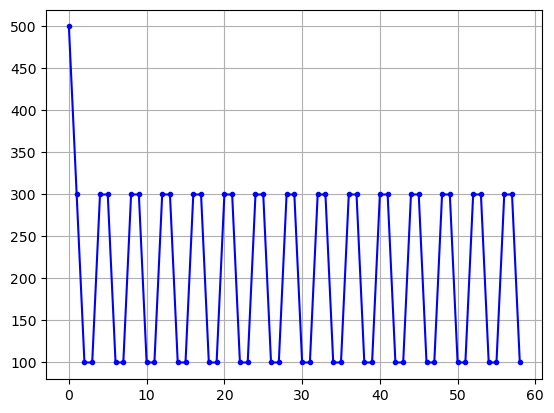

In [11]:
import simpy
env = simpy.Environment()
supplier = scm.Supplier(env=env, ID='S1', name='Supplier 1', node_type='infinite_supplier')
distributor = scm.InventoryNode(env=env, ID='D1', name='Distributor 1', node_type='distributor', capacity=500, initial_level=500, 
                                inventory_holding_cost=0.2, replenishment_policy=scm.SSReplenishment, policy_param={'s':200,'S':500}, 
                                product_sell_price=250, product_buy_price=200)
link1  = scm.Link(env=env, ID='L1', source=supplier, sink=distributor, cost=10, lead_time=lambda: 1)
demand1 = scm.Demand(env=env, ID='demand_1', name='Dem 1', order_arrival_model=lambda: 2, order_quantity_model=lambda:80, 
                     demand_node=distributor, delivery_cost=lambda: 10, lead_time=lambda: 1)
demand2 = scm.Demand(env=env, ID='demand_2', name='Dem 2', order_arrival_model=lambda: 2, order_quantity_model=lambda:120, 
                     demand_node=distributor, delivery_cost=lambda: 10, lead_time=lambda: 1)
scm.global_logger.enable_logging()
env.run(until=59)

import numpy as np
import matplotlib.pyplot as plt
supplynet = scm.create_sc_net(nodes=[supplier,distributor],links=[link1],demands=[demand1,demand2])
supplynet = scm.simulate_sc_net(supplynet, sim_time=60)
inv_levels = np.array(distributor.inventory.instantaneous_levels)
plt.plot(inv_levels[:,0], inv_levels[:,1], label='Inventory Level at D1', marker='.', color='blue')
plt.grid()
print_performance_metrics(supplynet)

### AnyLogistix 'Exercise 1'

__SC Network Desc:__

Total Nodes = 4, Replenish: SS with Safety <br>

- S1 -> DC1 -> demand1, demand2 <br>
- (inf) -> sSwS=(200,500,100) -> 120/2days, 80/2days <br>
- lead time = 1 for all links
- time period = 59 days <br>

INFO sim_trace - 0.0000:D1: Inventory levels:500
INFO sim_trace - 0.0000:demand_1:Customer1:Demand at Distributor 1, Order quantity:80, available.
INFO sim_trace - 0.0000:D1: Inventory levels:300
INFO sim_trace - 0.0000:D1:Replenishing inventory from supplier:Supplier 1, order placed for 300 units.
INFO sim_trace - 0.0000:demand_2:Customer1:Demand at Distributor 1, Order quantity:120, available.
INFO sim_trace - 0.0000:D1:shipment in transit from supplier:Supplier 1.
INFO sim_trace - 1.0000:demand_1:Customer1:Demand at Distributor 1, Order quantity:80 received. Current inv: 300
INFO sim_trace - 1.0000:demand_2:Customer1:Demand at Distributor 1, Order quantity:120 received. Current inv: 300
INFO sim_trace - 1.0000:D1:Inventory replenished. reorder_quantity=300, Inventory levels:600
INFO sim_trace - 2.0000:demand_1:Customer2:Demand at Distributor 1, Order quantity:80, available.
INFO sim_trace - 2.0000:D1: Inventory levels:400
INFO sim_trace - 2.0000:demand_2:Customer2:Demand at Distribu

Performance Metrics:
Total Available Inventory: 400
Average Available Inventory: 305.08474576271186
Total Inventory Carry Cost: 4740.0
Total Inventory Spend: 1180000
Total Transport Cost: 750
Total Revenue: 1500000
Total Cost: 1185490.0
Total Profit: 314510.0
Total Demand Placed by Customers: [60, 6000]
Total Fulfillment Received by Customers: [58, 5800]
Total Demand Placed by Site: [15, 5900]
Total Fulfillment Received by Site: [15, 5900]
Total Demand Placed: [75, 11900]
Total Fulfillment Received: [73, 11700]
Average Cost per Order: 15806.533333333333
Average Cost per Item: 99.62100840336134


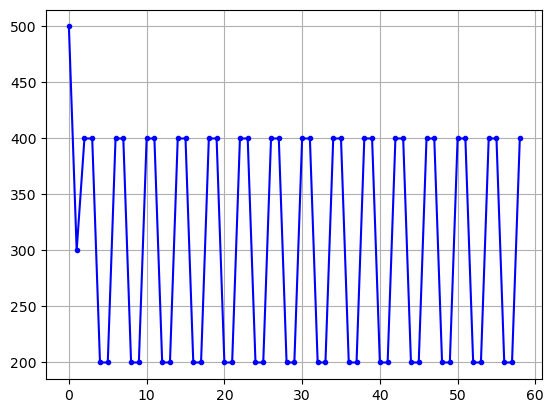

In [12]:
import simpy
env = simpy.Environment()
supplier = scm.Supplier(env=env, ID='S1', name='Supplier 1', node_type='infinite_supplier')
distributor = scm.InventoryNode(env=env, ID='D1', name='Distributor 1', node_type='distributor', capacity=600, initial_level=500, 
                                inventory_holding_cost=0.2, replenishment_policy=scm.SSWithSafetyReplenishment, 
                                policy_param={'s':200,'S':500,'safety_stock':100}, 
                                product_sell_price=250, product_buy_price=200)
link1  = scm.Link(env=env, ID='L1', source=supplier, sink=distributor, cost=10, lead_time=lambda: 1)
demand1 = scm.Demand(env=env, ID='demand_1', name='Dem 1', order_arrival_model=lambda: 2, order_quantity_model=lambda:80, 
                     demand_node=distributor, delivery_cost=lambda: 10, lead_time=lambda: 1)
demand2 = scm.Demand(env=env, ID='demand_2', name='Dem 2', order_arrival_model=lambda: 2, order_quantity_model=lambda:120, 
                     demand_node=distributor, delivery_cost=lambda: 10, lead_time=lambda: 1)
scm.global_logger.enable_logging()
env.run(until=59)

import numpy as np
import matplotlib.pyplot as plt
supplynet = scm.create_sc_net(nodes=[supplier,distributor],links=[link1],demands=[demand1,demand2])
supplynet = scm.simulate_sc_net(supplynet, sim_time=60)
inv_levels = np.array(distributor.inventory.instantaneous_levels)
plt.plot(inv_levels[:,0], inv_levels[:,1], label='Inventory Level at D1', marker='.', color='blue')
plt.grid()
print_performance_metrics(supplynet)

### AnyLogistix 'Exercise 1'

__SC Network Desc:__

Total Nodes = 3, Replenish: Regular <br>

- S1 -> DC1 -> demand1, demand2 <br>
- (inf) -> TQ=(200,500) -> 120/2days <br>
- lead time = 1 for all links
- time period = 59 days <br>

INFO sim_trace - 0.0000:D1: Inventory levels:1000
INFO sim_trace - 0.0000:D1:Replenishing inventory from supplier:Supplier 1, order placed for 100 units.
INFO sim_trace - 0.0000:D1:shipment in transit from supplier:Supplier 1.
INFO sim_trace - 0.0000:demand_2:Customer1:Demand at Distributor 1, Order quantity:100, available.
INFO sim_trace - 1.0000:D1: Inventory levels:900
INFO sim_trace - 1.0000:D1:Replenishing inventory from supplier:Supplier 1, order placed for 100 units.
INFO sim_trace - 1.0000:D1:Inventory replenished. reorder_quantity=100, Inventory levels:900
INFO sim_trace - 1.0000:demand_2:Customer1:Demand at Distributor 1, Order quantity:100 received. Current inv: 900
INFO sim_trace - 1.0000:D1:shipment in transit from supplier:Supplier 1.
INFO sim_trace - 1.0000:demand_2:Customer2:Demand at Distributor 1, Order quantity:100, available.
INFO sim_trace - 2.0000:D1: Inventory levels:900
INFO sim_trace - 2.0000:D1:Replenishing inventory from supplier:Supplier 1, order placed for 

Performance Metrics:
Total Available Inventory: 900
Average Available Inventory: 901.6949152542373
Total Inventory Carry Cost: 10620.0
Total Inventory Spend: 1160000
Total Transport Cost: 1180
Total Revenue: 1475000
Total Cost: 1171800.0
Total Profit: 303200.0
Total Demand Placed by Customers: [59, 5900]
Total Fulfillment Received by Customers: [58, 5800]
Total Demand Placed by Site: [59, 5900]
Total Fulfillment Received by Site: [58, 5800]
Total Demand Placed: [118, 11800]
Total Fulfillment Received: [116, 11600]
Average Cost per Order: 9930.50847457627
Average Cost per Item: 99.30508474576271


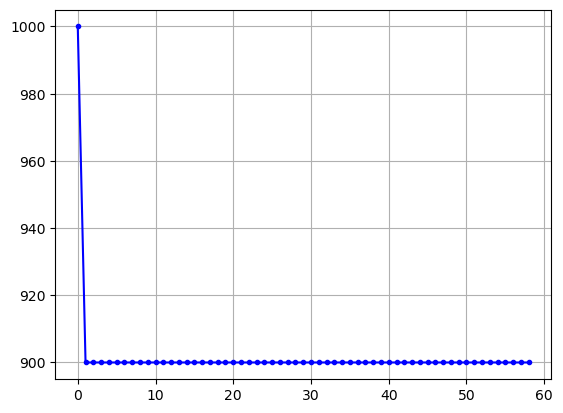

In [13]:
import simpy
env = simpy.Environment()
supplier = scm.Supplier(env=env, ID='S1', name='Supplier 1', node_type='infinite_supplier')
distributor = scm.InventoryNode(env=env, ID='D1', name='Distributor 1', node_type='distributor', capacity=1000, initial_level=1000, 
                                inventory_holding_cost=0.2, replenishment_policy=scm.PeriodicReplenishment, 
                                policy_param={'T':1,'Q':100}, 
                                product_sell_price=250, product_buy_price=200)
link1  = scm.Link(env=env, ID='L1', source=supplier, sink=distributor, cost=10, lead_time=lambda: 1)
demand2 = scm.Demand(env=env, ID='demand_2', name='Dem 2', order_arrival_model=lambda: 1, order_quantity_model=lambda:100, 
                     demand_node=distributor, delivery_cost=lambda: 10, lead_time=lambda: 1)
scm.global_logger.enable_logging()
env.run(until=59)

import numpy as np
import matplotlib.pyplot as plt
supplynet = scm.create_sc_net(nodes=[supplier,distributor],links=[link1],demands=[demand2])
supplynet = scm.simulate_sc_net(supplynet, sim_time=60)
inv_levels = np.array(distributor.inventory.instantaneous_levels)
plt.plot(inv_levels[:,0], inv_levels[:,1], label='Inventory Level at D1', marker='.', color='blue')
plt.grid()
print_performance_metrics(supplynet)

INFO sim_trace - 0.0000:D1: Inventory levels:420
INFO sim_trace - 0.0000:demand_2:Customer1:Demand at Distributor 1, Order quantity:40, available.
INFO sim_trace - 0.0000:D1: Inventory levels:380
INFO sim_trace - 0.0000:D1:Replenishing inventory from supplier:Supplier 1, order placed for 420 units.
INFO sim_trace - 0.0000:D1:shipment in transit from supplier:Supplier 1.
INFO sim_trace - 0.3000:demand_2:Customer2:Demand at Distributor 1, Order quantity:40, available.
INFO sim_trace - 0.3000:D1: Inventory levels:340
INFO sim_trace - 0.5000:demand_2:Customer1:Demand at Distributor 1, Order quantity:40 received. Current inv: 340
INFO sim_trace - 0.5000:D1:Inventory replenished. reorder_quantity=420, Inventory levels:760
INFO sim_trace - 0.6000:demand_2:Customer3:Demand at Distributor 1, Order quantity:40, available.
INFO sim_trace - 0.6000:D1: Inventory levels:720
INFO sim_trace - 0.8000:demand_2:Customer2:Demand at Distributor 1, Order quantity:40 received. Current inv: 720
INFO sim_trace

Performance Metrics:
Total Available Inventory: 560
Average Available Inventory: 553.5593220338983
Total Inventory Carry Cost: 6532.0
Total Inventory Spend: 280700
Total Transport Cost: 2170
Total Revenue: 409760
Total Cost: 289402.0
Total Profit: 120358.0
Total Demand Placed by Customers: [197, 7880]
Total Fulfillment Received by Customers: [196, 7840]
Total Demand Placed by Site: [20, 8020]
Total Fulfillment Received by Site: [20, 8020]
Total Demand Placed: [217, 15900]
Total Fulfillment Received: [216, 15860]
Average Cost per Order: 1333.6497695852534
Average Cost per Item: 18.201383647798743


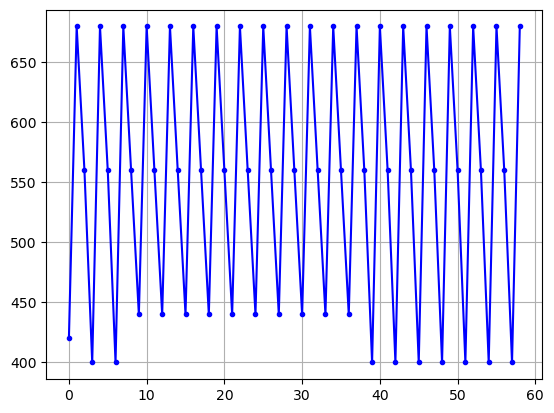

In [2]:
import simpy
env = simpy.Environment()
supplier = scm.Supplier(env=env, ID='S1', name='Supplier 1', node_type='infinite_supplier')
distributor = scm.InventoryNode(env=env, ID='D1', name='Distributor 1', node_type='distributor', capacity=800, initial_level=420, 
                                inventory_holding_cost=0.2, replenishment_policy=scm.SSReplenishment,
                                policy_param={'s':400,'S':800}, 
                                product_sell_price=52, product_buy_price=35)
link1  = scm.Link(env=env, ID='L1', source=supplier, sink=distributor, cost=10, lead_time=lambda: 0.5)
demand2 = scm.Demand(env=env, ID='demand_2', name='Dem 2', order_arrival_model=lambda: 0.3, order_quantity_model=lambda:40, 
                     demand_node=distributor, delivery_cost=lambda: 10, lead_time=lambda: 0.5)
scm.global_logger.enable_logging()
env.run(until=59)

import numpy as np
import matplotlib.pyplot as plt
supplynet = scm.create_sc_net(nodes=[supplier,distributor],links=[link1],demands=[demand2])
supplynet = scm.simulate_sc_net(supplynet, sim_time=60)
inv_levels = np.array(distributor.inventory.instantaneous_levels)
plt.plot(inv_levels[:,0], inv_levels[:,1], label='Inventory Level at D1', marker='.', color='blue')
plt.grid()
print_performance_metrics(supplynet)

In [9]:
levels = distributor.inventory.instantaneous_levels
#for lv in levels:
#    print(f"Time: {lv[0]:.4f}, Inventory Level: {lv[1]}")
print(f"sum = {(sum([x[1] for x in levels])-560-420)*0.22}")


sum = 7172.0
